In [60]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
#glob is use to list all the file in a directory
from glob import glob 

#The main package to work with audio data
import librosa 
import librosa.display

#to listen to sound
import IPython.display as ipd
from itertools import cycle

from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.preprocessing import scale, normalize

In [61]:
#For color and make my slide look nice

sns.set_theme(style='white', palette=None)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle=cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])

In [62]:
#We create a list containig all our audio file
audio=glob('cats_dogs/cats_dogs_split/cat/*.wav')

In [63]:
#We play the first and last audio
ipd.Audio(audio[0])

In [64]:
#we listen the last audio 
ipd.Audio(audio[-1])

In [65]:
y, sr=librosa.load(audio[0])

In [66]:
y

array([ 0.00378169,  0.00403648,  0.00164025, ..., -0.01496191,
       -0.01767992, -0.01192114], dtype=float32)

In [67]:
sr 

22050

In [68]:
print(f'y: {y[10]}')
print(f'shape: {y.shape}')
print(f'sr:{sr}')

y: -0.0029086382128298283
shape: (246960,)
sr:22050


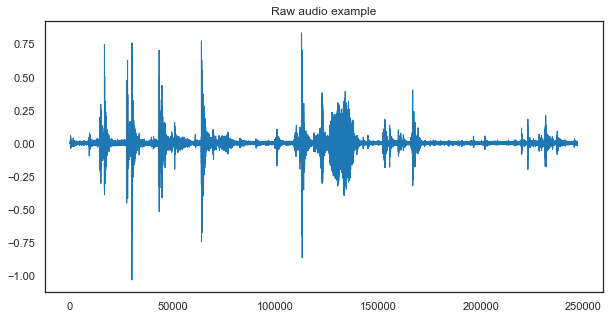

In [10]:
#We plot the wave function
pd.Series(y).plot(figsize=(10,5), lw=1, title='Raw audio example',
                 color=color_pal[0])
plt.show()

In [11]:
y_trimed, _=librosa.effects.trim(y)

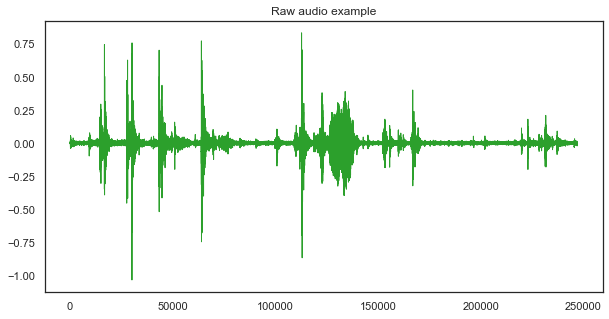

In [12]:
pd.Series(y_trimed).plot(figsize=(10,5), lw=1, title='Raw audio example',
                 color=color_pal[2])
plt.show()

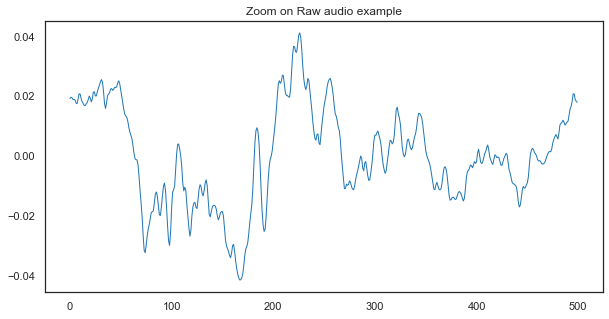

In [13]:
pd.Series(y_trimed[100000:100500]).plot(figsize=(10,5), lw=1, 
                    title='Zoom on Raw audio example',
                 color=color_pal[0])
plt.show()

In [14]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [15]:
s_db.shape

(1025, 483)

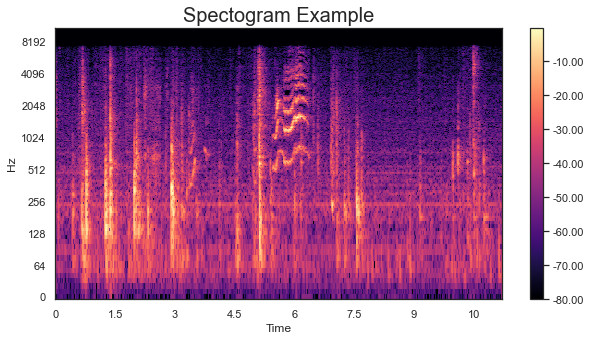

In [16]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db, x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [17]:
s=librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
s_db_mel=librosa.amplitude_to_db(s, ref=np.max)

C:\Users\GLC\AppData\Local\Temp\ipykernel_13376\279647130.py:1: FutureWarning: Pass y=[ 0.00378169  0.00403648  0.00164025 ... -0.01496191 -0.01767992
 -0.01192114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  s=librosa.feature.melspectrogram(y, sr=sr, n_mels=128)


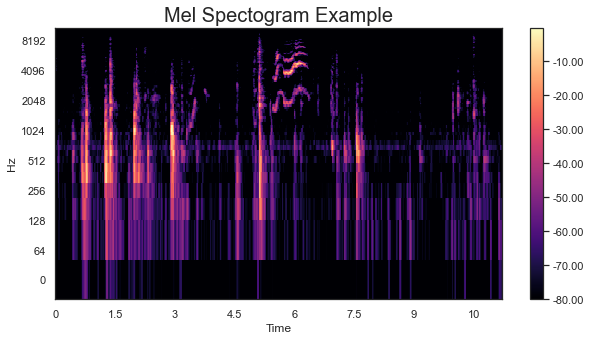

In [18]:
#Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db_mel, x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [19]:
df=pd.read_csv('train_test_split.csv')
df.head()

,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


Mel-frequency-cepstral coefficient (MFCC) from audio sample

In [20]:
mfccs= librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  
mfccs.shape

(40, 483)

In [21]:
mfccs

array([[-3.15165619e+02, -2.85670044e+02, -3.29105835e+02, ...,
        -3.82343475e+02, -3.83735229e+02, -3.88043182e+02],
       [ 7.51905289e+01,  8.75689087e+01,  1.08141815e+02, ...,
         1.34781967e+02,  1.27964828e+02,  1.21465729e+02],
       [-7.12992783e+01, -7.22336731e+01, -3.95862122e+01, ...,
         1.22693110e+01,  3.19641447e+00,  3.30933332e-02],
       ...,
       [ 1.68787730e+00,  1.96138418e+00, -1.06267524e+00, ...,
        -1.76694250e+00,  2.56575656e+00,  4.69114923e+00],
       [ 2.91728401e+00,  3.61033750e+00,  1.31771588e+00, ...,
        -1.03288841e+00,  3.81060183e-01,  1.65800047e+00],
       [-2.26824552e-01, -1.20758414e-01, -1.13062769e-01, ...,
        -1.69561553e+00, -1.07316446e+00,  6.51232958e-01]], dtype=float32)

In [22]:
len(audio)

164

In [23]:
extracted_features=[]
audio_file=glob('cats_dogs/cats_dogs_split/cat/*.wav')
for i in range(len(audio_file)):
    audio, sample_rate=librosa.load(audio_file[i], res_type='Kaiser_fast')
    mfccs_features= librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) 
    mfccs_features_scale=np.mean(mfccs_features.T, axis=0)
    class_label='cat'
    data=mfccs_features_scale
    extracted_features.append([data,class_label])
    
audio_file=glob('cats_dogs/cats_dogs_split/dog/*.wav')
for i in range(len(audio_file)):
    audio, sample_rate=librosa.load(audio_file[i], res_type='Kaiser_fast')
    mfccs_features= librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) 
    mfccs_features_scale=np.mean(mfccs_features.T, axis=0)
    class_label='dog'
    data=mfccs_features_scale
    extracted_features.append([data,class_label])

In [24]:
Audio_data=pd.DataFrame(extracted_features, columns=['Features', 'Class'])
Audio_data

,Features,Class
0,"[-319.31232, 135.17932, -22.885302, 39.70361, ...",cat
1,"[-293.93472, 25.26753, -92.220795, 28.823133, ...",cat
2,"[-196.83348, 98.87144, -46.47726, 42.705837, -...",cat
3,"[-263.0426, 93.66901, -43.99681, 1.898751, -28...",cat
4,"[-283.80536, 114.729454, -51.803192, 7.5615807...",cat
...,...,...
272,"[-373.46063, 110.01832, -23.819685, -13.935627...",dog
273,"[-390.50848, 91.290436, 16.07852, -11.926575, ...",dog
274,"[-348.47543, 137.24332, -8.201406, -35.960766,...",dog
275,"[-206.4135, 146.15518, -25.30952, 30.447338, -...",dog


In [25]:
#We randomly shuffle our dataframe
data = Audio_data.sample(frac=1, random_state=1).reset_index()
data.drop('index', axis=1, inplace=True)
#data.to_csv('audio.csv',sep='\t', index=False)

In [26]:
data['Class'].replace(to_replace=['cat'], value=0, inplace=True)
data['Class'].replace(to_replace=['dog'], value=1, inplace=True)

In [27]:
x=normalize(np.array(data['Features'].tolist()))
y=np.array(data['Class'].tolist())

In [28]:
x.shape

(277, 40)

#We randomly shuffle our dataframe
from sklearn.utils import shuffle
shuffled = shuffle(Audio_data, random_state=1).reset_index()
shuffled.drop('index', axis=1, inplace=True)
shuffled

In [29]:
#y=np.array(pd.get_dummies(y))

In [30]:
#We splint in train an test
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.30, random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
#instantiating the model
logist_reg = LogisticRegression()
logist_reg.fit(X_train,Y_train)

LogisticRegression()

In [32]:
y_pred_train  = logist_reg.predict(X_train)
y_pred_test = logist_reg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score 
#Training accuracy
accuracy_score(y_pred_train , Y_train)

0.8601036269430051

In [34]:
#Testing accuracy
accuracy_score(y_pred_test , Y_test)

0.8928571428571429

In [35]:
from sklearn.svm import SVC # "Support vector classifier"
#model = SVC(kernel='linear', C=1E10)
#model.fit(X_train,Y_train)

In [53]:
SVC?

In [37]:
model = SVC(kernel='linear', C=3000)

In [38]:
model.fit(X_train,Y_train)

SVC(C=3000, kernel='linear')

In [39]:
y_pred_train  = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [40]:
accuracy_score(y_pred_train , Y_train)

0.9430051813471503

In [41]:
accuracy_score(y_pred_test , Y_test)

0.8571428571428571

In [59]:
SVC?

In [42]:
#We load one of the cat sound and we check the prediction outcome
aud1=glob('cats_dogs/cats_dogs_split/cat/*.wav')
ipd.Audio(aud1[0])

In [43]:
#We predict wether is a cat or dog audio
audio, sample_rate=librosa.load(aud1[0], res_type='Kaiser_fast')
mfccs_features= librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) 
mfccs_features_scale=np.mean(mfccs_features.T, axis=0)
x2=normalize(np.array(mfccs_features_scale.tolist()).reshape(1,40))
y=model.predict(x2)
y[0]

0

In [44]:
#We load one of the dog sound and we check the prediction outcome
aud1=glob('cats_dogs/cats_dogs_split/dog/*.wav')
ipd.Audio(aud1[0])

In [45]:
#We predict wether is a cat or dog audio
audio, sample_rate=librosa.load(aud1[0], res_type='Kaiser_fast')
mfccs_features= librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40) 
mfccs_features_scale=np.mean(mfccs_features.T, axis=0)
x2=normalize(np.array(mfccs_features_scale.tolist()).reshape(1,40))
y=model.predict(x2)
y[0]

1

In [46]:
import sklearn.metrics

In [47]:
sklearn.metrics.confusion_matrix(Y_train,y_pred_train)

array([[106,   4],
       [  7,  76]], dtype=int64)

In [48]:
sklearn.metrics.confusion_matrix(Y_test,y_pred_test)

array([[47,  7],
       [ 5, 25]], dtype=int64)

In [49]:
sklearn.metrics.f1_score(Y_train,y_pred_train)

0.9325153374233127

In [50]:
sklearn.metrics.recall_score(Y_train,y_pred_train)

0.9156626506024096

In [51]:
sklearn.metrics.accuracy_score(Y_train,y_pred_train)

0.9430051813471503

In [52]:
sklearn.metrics.f1_score(Y_test,y_pred_test)

0.8064516129032259

In [56]:
sklearn.metrics.precision_score(Y_train,y_pred_train)

0.95

In [58]:
SVC?